In [501]:
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    
import pandas as pd
import keras
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn import preprocessing
from keras.utils import np_utils
from keras import optimizers

train = pd.read_csv("../data/titanic/train.csv")
test = pd.read_csv("../data/titanic/test.csv")
train = train.append(test) ## test 데이터도 학습에 이용.

# inplace=True 로 해야 모든 컬럼에 대해 fillna 가 이뤄짐.
# train.fillna(0, inplace=True) 
# test.fillna(0, inplace=True)


print(train.shape)
print(test.shape)



(1309, 12)
(418, 11)


In [502]:

# cols = PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked

# 데이터 전처리 : 학습에 필요없는 column 제거.
train.pop('Name'), test.pop('Name')
train.pop('Ticket'), test.pop('Ticket')
train.pop('Cabin'), test.pop('Cabin')
train.pop('PassengerId'), test.pop('PassengerId') # 제거하지 않으면 passengerId 가 높을수록 predicton value 가 높은 현상

train.dropna(inplace=True)
# test.dropna(inplace=True)
print(train.shape)
print(test.shape)

# 데이터 전처리 : One Hot Encoding
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
enc = encoder.fit(train[['Embarked']].astype(str))
train = pd.merge(train, pd.DataFrame(enc.transform(train[['Embarked']].astype(str))) , right_index=True, left_index=True)
test = pd.merge(test, pd.DataFrame(enc.transform(test[['Embarked']].astype(str))) , right_index=True, left_index=True)
enc = encoder.fit(train[['Sex']].astype(str))
train = pd.merge(train, pd.DataFrame(enc.transform(train[['Sex']].astype(str))) , right_index=True, left_index=True)
test = pd.merge(test, pd.DataFrame(enc.transform(test[['Sex']].astype(str))) , right_index=True, left_index=True)
train.pop('Embarked'), test.pop('Embarked')
train.pop('Sex'), test.pop('Sex')

# label
y_train = train[['Survived']]

# feature
train.pop('Survived')
x_train = train
x_test = test

x_train.head(5)



(712, 8)
(418, 7)


,Age,Fare,Parch,Pclass,SibSp,0_x,1,2,0_y
0,22.0,7.2500,0,3,1,0,0,1,1
1,38.0,71.2833,0,1,1,1,0,0,0
2,26.0,7.9250,0,3,0,0,0,1,0
3,35.0,53.1000,0,1,1,0,0,1,0
4,35.0,8.0500,0,3,0,0,0,1,1


In [503]:
# from sklearn.cluster import DBSCAN
# outlier_detection = DBSCAN(
#     eps = 0.5,
#     metric="euclidean",
#     n_jobs = -1)
# clusters = outlier_detection.fit_predict(train[['Fare']])
# clusters

In [504]:
live = len(y_train[y_train['Survived']==1])
death = len(y_train[y_train['Survived']==0])
print("live : " , live)
print("death : " , death)
print(
    "생존률 : " , live / (live + death)
)
y_train.head(5)

live :  182
death :  264
생존률 :  0.4080717488789238


,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


In [505]:
x_test.head(5)

,Pclass,Age,SibSp,Parch,Fare,0_x,1,2,0_y
0,3,34.5,0,0,7.8292,0,1,0,1
1,3,47.0,1,0,7.0000,0,0,1,0
2,2,62.0,0,0,9.6875,0,1,0,1
3,3,27.0,0,0,8.6625,0,0,1,1
4,3,22.0,1,1,12.2875,0,0,1,0


In [524]:

model = Sequential()
model.add(Dense(9, kernel_initializer = 'uniform',activation='relu', input_dim=len(x_train.columns)))
model.add(Dropout(0.1))
model.add(Dense(9, kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(5, kernel_initializer = 'uniform',activation='relu'))
model.add(Dense(1, kernel_initializer = 'uniform',activation='sigmoid'))

# opt = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

# opt = optimizers.Adam(lr=0.001, beta_1=0.5, beta_2=0.99, epsilon=None, decay=0.0, amsgrad=False)
opt = optimizers.Adam(lr=0.0000005)

model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# model.compile(loss='binary_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])

print(model.summary)

hist = model.fit(x_train, y_train, epochs=100, batch_size=30,validation_split=0.2)



<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x1a4c7f7710>>
Train on 356 samples, validate on 90 samples
Epoch 1/100
356/356 [==============================] - 8s 23ms/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 2/100
356/356 [==============================] - 0s 264us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 3/100
356/356 [==============================] - 0s 219us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 4/100
356/356 [==============================] - 0s 234us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 5/100
356/356 [==============================] - 0s 242us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 6/100
356/356 [==============================] - 0s 242us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 7/100
356/356 [==============================]

356/356 [==============================] - 0s 219us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6932 - val_acc: 0.5222
Epoch 61/100
356/356 [==============================] - 0s 220us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 62/100
356/356 [==============================] - 0s 203us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 63/100
356/356 [==============================] - 0s 194us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 64/100
356/356 [==============================] - 0s 209us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 65/100
356/356 [==============================] - 0s 203us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 66/100
356/356 [==============================] - 0s 193us/step - loss: 0.6931 - acc: 0.6096 - val_loss: 0.6931 - val_acc: 0.5222
Epoch 67/100
356/356 [==============================] - 0s 21

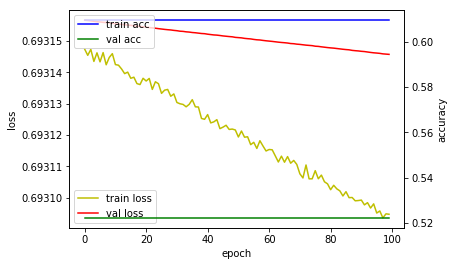

In [525]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='lower left')

acc_ax.plot(hist.history['acc'], 'b', label='train acc')
acc_ax.plot(hist.history['val_acc'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper left')

plt.show()

In [526]:
model.predict(x_test)

array([[ 0.49984848],
       [ 0.49983937],
       [ 0.49982852],
       [ 0.49985328],
       [ 0.49985638],
       [ 0.49986258],
       [ 0.49985227],
       [ 0.49985656],
       [ 0.49986079],
       [ 0.49986026],
       [        nan],
       [ 0.49983865],
       [ 0.49985513],
       [ 0.49982625],
       [ 0.49984699],
       [ 0.4998596 ],
       [ 0.49984789],
       [ 0.49985805],
       [ 0.49985376],
       [ 0.49984127],
       [ 0.49984032],
       [ 0.49986592],
       [        nan],
       [ 0.49985734],
       [ 0.49981302],
       [ 0.49983627],
       [ 0.49985698],
       [ 0.49985698],
       [ 0.49984419],
       [        nan],
       [ 0.49983567],
       [ 0.49985912],
       [ 0.49984711],
       [        nan],
       [ 0.49985483],
       [ 0.49985984],
       [        nan],
       [ 0.49985817],
       [ 0.49985471],
       [        nan],
       [ 0.49984396],
       [        nan],
       [ 0.4998433 ],
       [ 0.4998515 ],
       [ 0.49984711],
       [ 0

In [527]:
pred = model.predict_classes(x_test)
live = len([x for x in pred.ravel() if x==1])
death = len([x for x in pred.ravel() if x==0])
print("live : " , live)
print("death : " , death)
print("생존율 : ", live / (live + death))
# pred

live :  0
death :  418
생존율 :  0.0


In [528]:
df_pred = pd.read_csv("../data/titanic/gender_submission.csv")
df_pred[['Survived']] = pred
# df_pred

In [529]:
df_pred.to_csv('result.csv', index=False)